In [18]:
from formats import load_style
load_style()

###  Import esseential Libraries

In [3]:
import numpy
import pandas
import math
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [4]:
numpy.random.seed(7)

### Load Dataset 

In [5]:
dataframe = pandas.read_csv('Data/AirPassengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

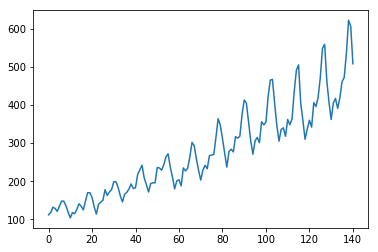

In [17]:
plt.plot(dataframe)
plt.show()

### Scale Dataset 

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

### Train Test Split 

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

94 47


#### convert an array of values into a dataset matrix 

In [9]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

#### reshape into X=t and Y=t+1

In [10]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### Create and fit the LSTM network 

In [12]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
2s - loss: 0.0405
Epoch 2/100
0s - loss: 0.0199
Epoch 3/100
0s - loss: 0.0146
Epoch 4/100
0s - loss: 0.0135
Epoch 5/100
0s - loss: 0.0124
Epoch 6/100
0s - loss: 0.0116
Epoch 7/100
0s - loss: 0.0105
Epoch 8/100
0s - loss: 0.0096
Epoch 9/100
0s - loss: 0.0086
Epoch 10/100
0s - loss: 0.0075
Epoch 11/100
0s - loss: 0.0065
Epoch 12/100
0s - loss: 0.0056
Epoch 13/100
0s - loss: 0.0049
Epoch 14/100
0s - loss: 0.0041
Epoch 15/100
0s - loss: 0.0035
Epoch 16/100
0s - loss: 0.0030
Epoch 17/100
0s - loss: 0.0027
Epoch 18/100
0s - loss: 0.0024
Epoch 19/100
0s - loss: 0.0022
Epoch 20/100
0s - loss: 0.0021
Epoch 21/100
0s - loss: 0.0020
Epoch 22/100
0s - loss: 0.0020
Epoch 23/100
0s - loss: 0.0020
Epoch 24/100
0s - loss: 0.0020
Epoch 25/100
0s - loss: 0.0019
Epoch 26/100
0s - loss: 0.0020
Epoch 27/100
0s - loss: 0.0020
Epoch 28/100
0s - loss: 0.0019
Epoch 29/100
0s - loss: 0.0019
Epoch 30/100
0s - loss: 0.0020
Epoch 31/100
0s - loss: 0.0020
Epoch 32/100
0s - loss: 0.0019
Epoch 33/100
0s -

### Predictions 

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [14]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

### Check Error Rates 

In [15]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.34 RMSE
Test Score: 45.66 RMSE


### Ploting 

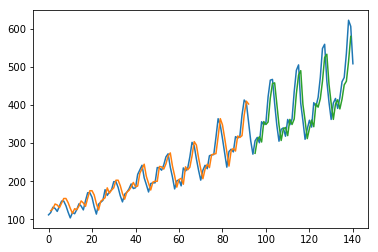

In [16]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()